In [1]:
# Written by Sebastien Popoff
# 29/10/2016
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib as mpl
from matplotlib import rc
rc('figure', figsize=(19,10))
#rc('text', usetex=True)

In [9]:
## Parameters of the DMD
d = 7.6 # pitch in microns
theta = 12./180*np.pi
theta_1D = np.arctan(np.tan(theta)/np.sqrt(2))
## Wavelength
_lambda = 1.550 # in microns
## Incident angle
alpha = 24./180*np.pi
alpha_1D = np.arctan(np.tan(alpha)/np.sqrt(2))

In [10]:
## A simple criterion matching the diffraction angle and the reflection angle
#mu = lambda x: 2.*d/_lambda *np.cos(x-theta_1D)*np.sin(theta_1D)
_beta = lambda x: 2*theta_1D-x#np.arctan(np.tan(2*theta-x)/np.sqrt(2))
mu = lambda x: 1.*d/_lambda *(np.sin(x)+np.sin(_beta(x)))
# when mu is an integer, we are at a blazing angle with a maximum of energy at the order along the optical axis
# whem mu is n+1/2, the enregy is spread over many diffraction orders not aligned with the optical axis

In [11]:
# test different incident angles
alpha_vec = np.linspace(-np.pi/2,np.pi/2,1000)
alpha_1D_vec = np.arctan(np.tan(alpha_vec)/np.sqrt(2))
criterion = np.abs(np.mod([mu(a) for a in alpha_1D_vec],1)-0.5)

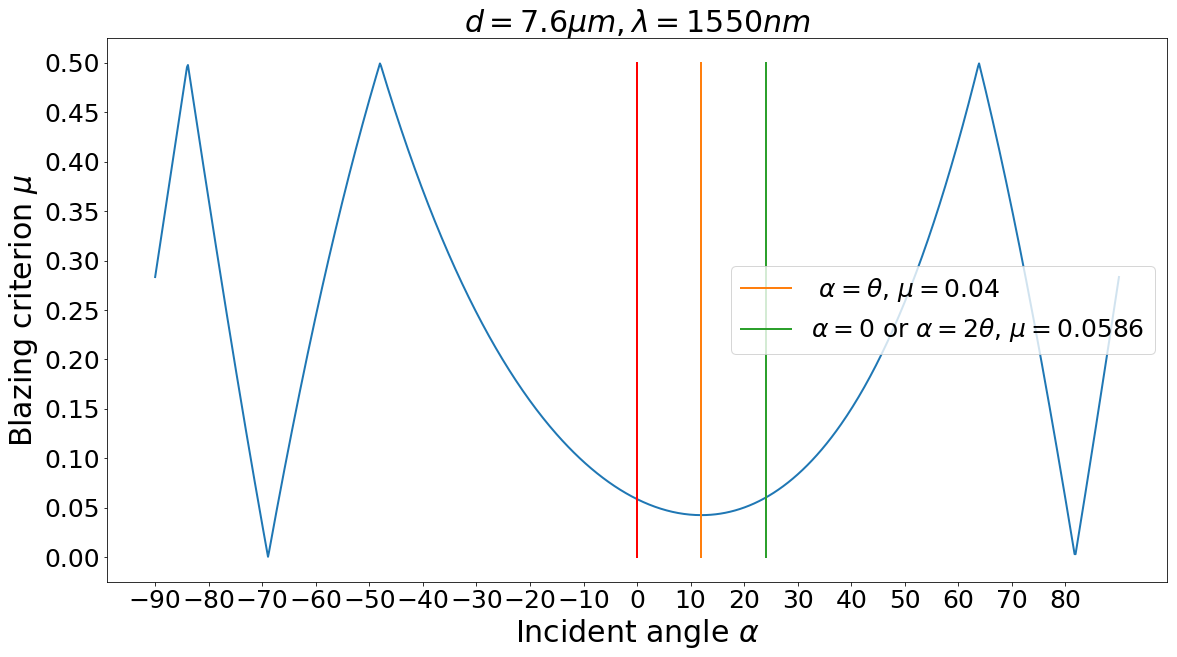

In [12]:
plt.figure()
plt.plot(alpha_vec*180/np.pi,criterion,linewidth = 2)
label = r' $\alpha = \theta$, $\mu = %.2f$' % np.abs(np.mod(mu(theta_1D),1)-0.5)
plt.plot([theta*180/np.pi,theta*180/np.pi],[0.,0.5],label = label,linewidth = 2)
label = r'$\alpha = 0$ or $\alpha = 2\theta$, $\mu = %.4f$' % np.abs(np.mod(mu(2*theta_1D),1)-0.5)
plt.plot([2*theta*180/np.pi,2*theta*180/np.pi],[0.,0.5],label = label,linewidth = 2)
plt.plot([0,0],[0.,0.5],color = 'red',linewidth = 2)
plt.xticks(np.arange(-90,90,10),fontsize = 25)
plt.yticks(np.arange(0,0.55,0.05),fontsize = 25)
plt.title(r'$d=%.1f\mu m, \lambda =%g nm$' % (d,1e3*_lambda),fontsize = 30)
plt.legend(fontsize = 25,loc='center right')
plt.ylabel(r'Blazing criterion $\mu$', fontsize = 30)
plt.xlabel(r'Incident angle $\alpha$', fontsize = 30)

In [13]:
## A full numerical simulation of the Fourier plane for an all-on configuration
beta = -alpha +2*theta # reflection angle
alpha_1D = np.arctan(np.tan(alpha)/np.sqrt(2))
beta_1D = 2*theta_1D-alpha_1D#np.arctan(np.tan(beta)/np.sqrt(2))
N = 20 # number of mirrors in each direction
g = 2 # gap between pixels in micron
res = 10 # pixels per mirror (for numerical calculation)
Nx = N*res

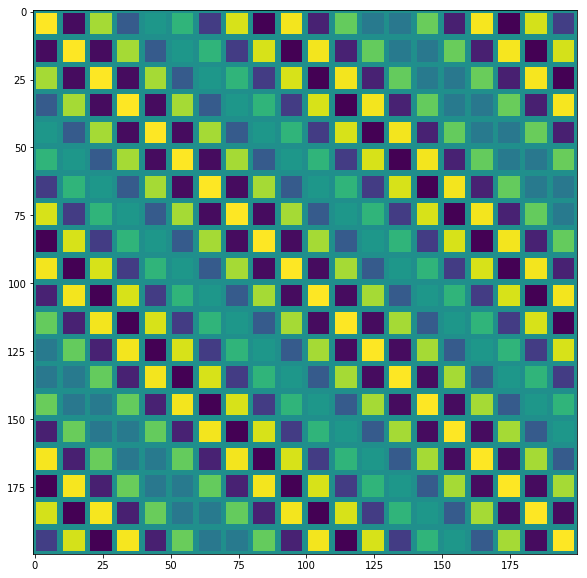

In [14]:
## Pixelate image function
f = np.ones([N,N]) # all-on configuration
## Phase slope due to incident and reflection angle
X,Y = np.meshgrid(np.arange(N),np.arange(N))
phi = np.exp((X-Y)*complex(0,1)*2*np.pi/_lambda*d*(np.sin(alpha_1D)+np.sin(beta_1D)))
## cell unit
Cell = np.zeros([res,res])
gpix = int(np.round(g/(2.*d)*res))
Cell[gpix:res-gpix,gpix:res-gpix] = 1.
## Mirror image
MI = np.zeros([Nx,Nx],dtype='complex')
for i in range(N):
    for j in range(N):
        MI[i*res:(i+1)*res,j*res:(j+1)*res]= f[i,j]*phi[i,j]*Cell
plt.figure()
plt.imshow(np.real(MI),interpolation = 'None')

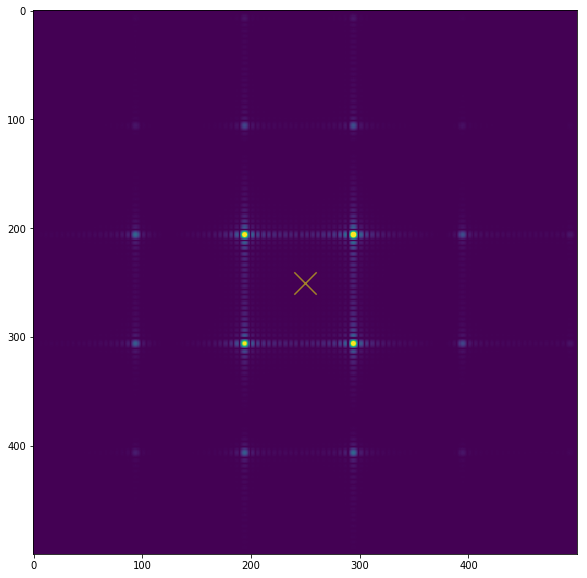

In [15]:
## In the Fourier plane
coeff = 5
FP = np.fft.fftshift(np.fft.fft2(MI,s=[coeff*Nx,coeff*Nx]))
ROIsize = 500
ROI = 1
plt.figure()
plt.imshow((np.abs(FP[coeff*Nx//2-ROIsize//2:coeff*Nx//2+ROIsize//2,coeff*Nx//2-ROIsize//2:coeff*Nx//2+ROIsize//2])),interpolation = 'None')
plt.clim([0,(np.max(np.abs(FP)))/1.5])
plt.scatter(ROIsize//2, ROIsize//2, s=500, edgecolors='red',alpha = 0.5,c='yellow',linewidths= 3.,  marker='x')